
<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> APRENDIZAJE AUTOMATICO CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4> TRABAJO FINAL
 </font></h1>
<br>
<br>
<div style="text-align:right">
<font color="#7F000E" size=3> **RODRIGO VALVERDE**</font><br>
<font color="#7F000E" size=3> Curso 2290, Clases Lunes y Miercoles 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Cuarta Clase </font><br>
</div>

---

## **TIPO DE APRENDIZAJE Y ALGORITMO:**

## ***Aprendizaje supervisado***

## ***Algoritmo K-nearest neighbor***

## **DESCRIPCION DEL DATASET:**

# PASO 1 - COLECTAR DE DATOS

Para afrontar la problemática que deseas resolver, deberás investigar y obtener datos que utilizaras para alimentar a tu máquina. Importa mucho la calidad y cantidad de información que consigas ya que impactará directamente en lo bien o mal que luego funcione nuestro modelo. Puede que tengas la información en una base de datos ya existente o que la debas crear desde cero. Para este pequeño proyecto puedes crear una planilla de cálculos que luego se exportará fácilmente como archivo csv.

In [16]:
import pandas as pd

# aqui almaceno el dataset 'Palmer Penguins' en la variable 'url' desde mi pagina de github

url = 'https://gist.githubusercontent.com/Rodr1to/0b7c406bd80b0c634079f32db3d19f72/raw/ad73e53ab1bea7ca68988929ff29af04a505024d/penguins.csv'
data = pd.read_csv(url)

data.head()


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [17]:
data.info

<bound method DataFrame.info of      rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
3        4     Adelie  Torgersen             NaN            NaN   
4        5     Adelie  Torgersen            36.7           19.3   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2      

In [18]:
data.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


# PASO 2 - PREPARAR LOS DATOS

Deberemos tener balanceada la cantidad de datos que tenemos para cada resultado(clase), para que sea representativo, ya que si no, el aprendizaje podrá ser tendencioso hacia un tipo de respuesta y cuando nuestro modelo intente generalizar el conocimiento fallará.
También deberemos separar los datos en en dos grupos: uno para entrenamiento y otro para evaluación del modelo. Podemos fraccionar aproximadamente en una proporción de 80/20 pero puede variar según el caso y el volumen de datos que tengamos.
En esta etapa también podemos preprocesar nuestros datos normalizando, eliminar duplicados y hacer corrección de errores.

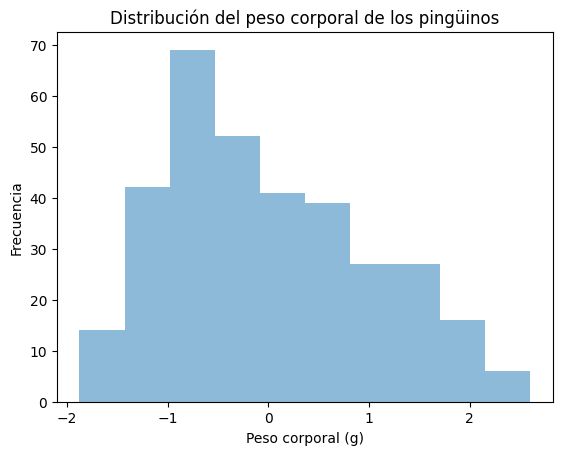

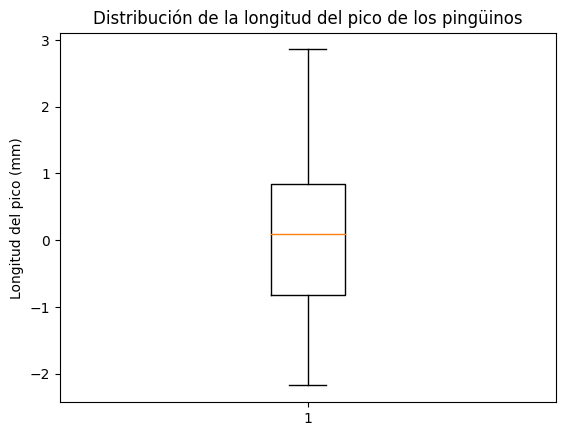

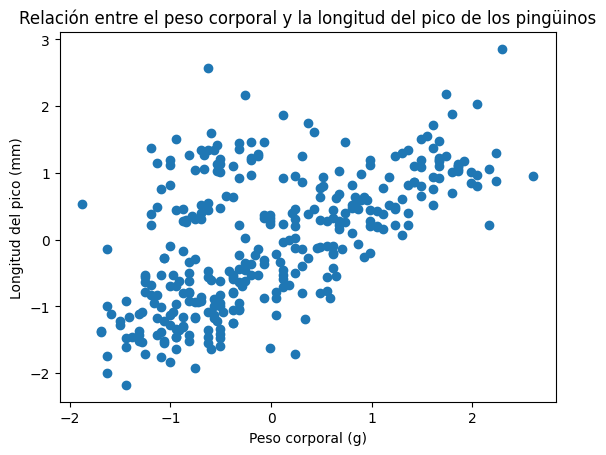

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# eliminamos filas con valores nulos
data = data.dropna()

# codificamos variables categoricas
data = pd.get_dummies(data)

# normalizamos las variables numeéricas
scaler = StandardScaler()
data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# creamos una nueva columna para la especie original
data['species'] = data[['species_Adelie', 'species_Chinstrap', 'species_Gentoo']].idxmax(axis=1)

# removemos el prefijo 'species_' de la nueva columna 'species'
data['species'] = data['species'].str.replace('species_', '')

# histograma del peso corporal
plt.hist(data['body_mass_g'], bins=10, alpha=0.5)
plt.xlabel('Peso corporal (g)')
plt.ylabel('Frecuencia')
plt.title('Distribución del peso corporal de los pingüinos')
plt.show()

# boxplot de la longitud del pico
plt.boxplot(data['bill_length_mm'])
plt.ylabel('Longitud del pico (mm)')
plt.title('Distribución de la longitud del pico de los pingüinos')
plt.show()

# scatter plot de la relacion entre el peso corporal y la longitud del pico
plt.scatter(data['body_mass_g'], data['bill_length_mm'])
plt.xlabel('Peso corporal (g)')
plt.ylabel('Longitud del pico (mm)')
plt.title('Relación entre el peso corporal y la longitud del pico de los pingüinos')
plt.show()



# PASO 3 - ELEGIR EL MODELO

Existen diversos modelos que podemos elegir de acuerdo al objetivo que tengamos: utilizaremos algoritmos de clasificación, predicción, regresión lineal, clustering (ejemplo k-means ó k-nearest neighbor), , bayesiano, etc y podrá haber variantes si lo que vamos a procesar son imágenes, sonido, texto, valores numéricos.

In [20]:
# el modelo que usaremos sera K-nearest neighbors para predecir la especie segun datos de nuevos pinguinos

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# PASO 4 - Entrenar datos


Utilizaremos el set de datos de entrenamiento para ejecutar nuestra máquina y deberemos de ver una mejora incremental (para la predicción). Recordar inicializar los “pesos” de nuestro modelo aleatoriamente, los pesos son los valores que multiplican o afectan a las relaciones entre las entradas y las salidas, se irán ajustando automáticamente por el algoritmo seleccionado cuanto más se entrena. Revisar los resultados obtenidos y corregir (por ej. inclinación de la pendiente) y volver a iterar…

In [21]:
# dividimos los datos en conjuntos de entrenamiento y prueba
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creamos y entrenamos el modelo
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# PASO 5- EVALUACION


Deberemos comprobar la máquina creada contra nuestro set de datos de Evaluación que contiene entradas que el modelo desconoce y verificar la precisión de nuestro modelo ya entrenado. Si la exactitud es menor o igual al 50% ese modelo no será útil ya que sería como lanzar una moneda al aire para tomar decisiones. Si alcanzamos un 90% o más podremos tener una buena confianza en los resultados que nos otorga el modelo.

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# hacemos predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# verificamos que las longitudes de y_test y predictions son iguales
assert len(y_test) == len(predictions), "Las longitudes de y_test y predictions deben ser iguales."

# calculamos la precision del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# calculamos la precision, la exhaustividad, el puntaje F1 y el soporte
print(classification_report(y_test, predictions))

# calculamos la matriz de confusion
conf_mat = confusion_matrix(y_test, predictions)
print(f'Confusion matrix:\n {conf_mat}')




Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion matrix:
 [[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]


# PASO 6 -PREDICCION DE INFERENCIA
Ya estamos listos para utilizar nuestro modelo de Aprendizaje Automático! con nueva información y comenzar a predecir o inferir resultados “en la vida real”… Imaginemos que si este paso fuera pasar de un simulador de un coche a aplicar nuestra máquina en un coche de verdad… es un gran momento y también será un emocionante desafío poner a prueba realmente todo LO APRENDIDO.


In [23]:

# supongamos que tenemos un nuevo pinguino con las siguientes caracteristicas
new_penguin = pd.DataFrame([{
    'bill_length_mm': 50,
    'bill_depth_mm': 20,
    'flipper_length_mm': 200,
    'body_mass_g': 4500,
    'sex_female': 0,
    'sex_male': 1,
    'island_Biscoe': 1,
    'island_Dream': 0,
    'island_Torgersen': 0,
    'species_Adelie': 0,
    'species_Chinstrap': 0,
    'species_Gentoo': 1,
    'rowid': 0,
    'year': 2007
}])

# reordenamos las caracteristicas en new_penguin sin generar una copia
new_penguin_reordered = new_penguin[X.columns].copy()

# normalizamos las caracteristicas usando el mismo scaler
new_penguin_reordered[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.transform(new_penguin_reordered[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# realizamos la prediccion
prediction = model.predict(new_penguin_reordered)
print(f'Predicted species: {prediction}')


Predicted species: ['Adelie']
